# Partie 1 - Les données

### 1. Importer les données et visualiser les premières observations :

In [9]:
import pandas as pd

train = pd.read_csv('titanic_train.csv', sep=',')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 2. Indexer les données :

In [10]:
train.set_index("PassengerId", inplace=True, drop=True)

### 3. Observer les noms des variables à l’aide train.columns et faire le bilan de celles-ci à l’aide des informations disponibles sur le web.

In [11]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

/tmp/ipykernel_76054/2479090422.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(train.corr(), cmap="PiYG", vmax=1.0, vmin=-1.0)


<AxesSubplot: >

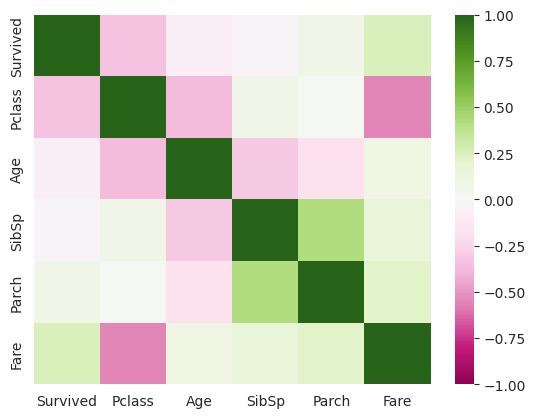

In [12]:
import seaborn as sn

sn.heatmap(train.corr(), cmap="PiYG", vmax=1.0, vmin=-1.0)

- `Survived` : boolean pour savoir si le passager à survécu ou non (0 = mort, et 1 = survive)
- `Pclass` : Formule ( 1 = Premier classe, 2 = Seconde classe, et 3 = Troisième classe )
- `Name` : Nom du passager
- `Sex` : Sex du passager
- `Age` : Age du passager
- `SibSp` : Nombre de frères/sœurs/conjoints qui est abord du Titanic
- `Parch` : Nombre de parents/enfants qui est abord du Titanic
- `Ticket` : Numéro de ticket
- `Fare` : Tarif
- `Cabin` : Numéro de Cabine
- `Embarked` : Port d'embarquement (C = Cherbourg, Q = Queenstown, S = Southampton)

# Partie 2 - Première modèle de niveau 0

### 1. Filtrer et construire les données du modèle 0

In [13]:
def parse_model_0(X):
    target = X.Survived
    X = X[["Fare", "SibSp", "Parch"]]
    return X, target


X, y = parse_model_0(train.copy())

In [14]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

On utilise la validation croisée, car on essaye de compenser le faire de ne pas avoir un gros échantillon pour la phase d'apprentissage. On préfère donc utiliser cette méthode plutôt, qu'une validation "conventionnelle", parce qu'il n'y pas de sufficient d'exemples pour réaliser un partitionnement en deux ensembles (un pour l'apprentissage et un autre pour les tests). En effet, on note que l'on dispose de 342 personnes qui ont survécu contre 549. De plus, on peut dire que l'échantillon est équilibré, on n'a pas classe qui est fortement majoritaire au détriment de l'autre.

In [41]:
import numpy as np
from sklearn.model_selection import cross_val_score


def compute_score(clf, X, y):
    xval = cross_val_score(clf, X, y, cv=5)
    return np.mean(xval)



### 3. Calculer le modèle de régression logistique.

In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X, y)

compute_score(lr, X, y)

/home/ludwig/Documents/ULCO/M2/IA - Verel/TPS/Tp2/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ludwig/Documents/ULCO/M2/IA - Verel/TPS/Tp2/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

0.7867553825874083

# Partie 3 - Deuxième modèle

### 1. Diviser la population en deux sous-populations en fonction de la variable à prédire

In [43]:
survived = train.copy()[train.Survived == 1]
dead = train.copy()[train.Survived == 0]

### 2. Tracer l’histogramme de la distribution des survivants et des victimes pour la variable Pclass

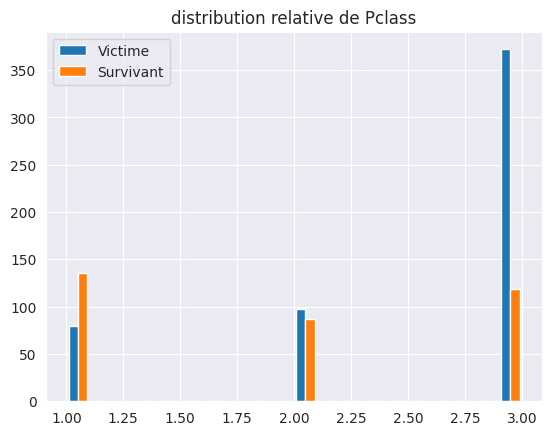

In [44]:
import matplotlib.pyplot as plt


def plot_hist(feature, bins=20):
    x1 = dead[feature].dropna()
    x2 = survived[feature].dropna()
    plt.hist([x1, x2], label=["Victime", "Survivant"], bins=bins)  #, color = [’’, ’b’]
    plt.legend(loc="upper left")
    plt.title("distribution relative de %s" % feature)
    plt.show()


plot_hist("Pclass")

### 3. La variable Pclass est-elle importante ? Pourquoi ?

On remarque que la propriété de la troisième classe à une grosse importante par rapport à l'information de la seconde ou la première classe. Car pour la 1er et 2nd classe on note environ 50% de survivants et 50% de victimes, alors que pour la troisième classe, on observe un grand nombre de victimes. On peut donc en conclure que la propriété de la classe est important particulièrement dans le cas de la troisième classe.

### 4. La variable catégorielle Pclass a peu de modalité, on peut donc créer une variable ’dummy’ pour chaque modalité. Transformer la variable catégorielle Pclass en variable dummy et créer le nouveau jeu de donnée pour le modèle 1

In [45]:
def parse_model_1(X):
    target = X.Survived
    class_dummies = pd.get_dummies(X["Pclass"], prefix="split_Pclass")
    X = X.join(class_dummies)
    to_del = ["Name", "Age", "Cabin", "Embarked", "Survived", "Ticket", "Sex", "Pclass"]
    for col in to_del:
        del X[col]
    return X, target

### 5. Calculer le modèle de régression logistique. Commenter

In [46]:
X, y = parse_model_1(train.copy())

lr.fit(X, y)
compute_score(lr, X, y)

/home/ludwig/Documents/ULCO/M2/IA - Verel/TPS/Tp2/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6937040989266211

On note qu'avec l'information de la classe, on obtient un meilleur score. Cela s'expliquer par le fait que cette nouvelle propriété permet une meilleure généralisation.

### 6. Tracer les coefficients de la régression logistique et donner une interprétation ceux-ci :

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


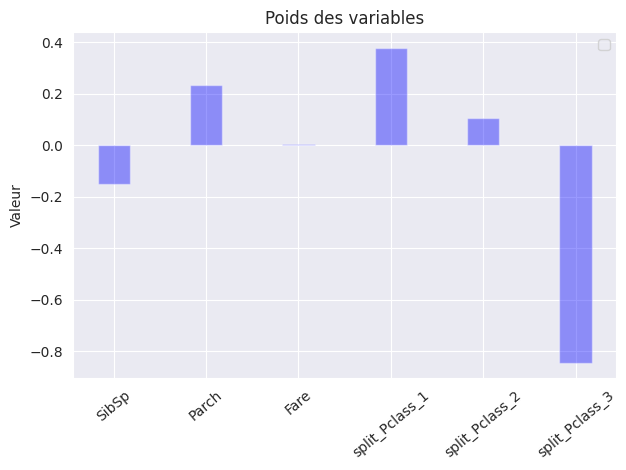

In [47]:
def plot_lr_coefs(X, lr):
    fig, ax = plt.subplots()
    xlabels = X.columns.values.tolist()
    yvalues = lr.coef_[0,]
    index = np.arange(len(yvalues))
    bar_width = 0.35
    opacity = 0.4
    rects = plt.bar(index, yvalues,
                    bar_width, alpha=opacity,
                    color="b", label="")
    plt.ylabel("Valeur")
    plt.title("Poids des variables")
    plt.xticks(index, xlabels, rotation=40)
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_lr_coefs(X, lr)

Cela confirme la précédente hypothèse, car on note que l'information ce la troisième classe à une
influence négativement sur le fait de survivre.

# Partie 4 - Troisiéme modéle

### 1. Créer le nouveau jeu de donnée en utilisant la méthode fillna pour les valeurs manquantes.

In [48]:
def parse_model_2(X):
    X.Age = X.Age.fillna(np.nanmedian(X["Age"]))

    target = X.Survived

    class_dummies = pd.get_dummies(X["Pclass"], prefix="split_Pclass")
    X = X.join(class_dummies)

    class_dummies = pd.get_dummies(X["Sex"], prefix="split_sex")
    X = X.join(class_dummies)

    to_del = ["Name", "Cabin", "Embarked", "Survived", "Ticket", "Sex", "Pclass"]
    for col in to_del:
        del X[col]
    return X, target



### 2. Calculer la régression logistique

In [49]:
X, y = parse_model_2(train.copy())

lr = LogisticRegression()
lr.fit(X, y)

compute_score(lr, X, y)

/home/ludwig/Documents/ULCO/M2/IA - Verel/TPS/Tp2/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ludwig/Documents/ULCO/M2/IA - Verel/TPS/Tp2/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

0.7867553825874083

### 3. Les nouvelles variables créées sont-elles importantes dans la régression obtenue ?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


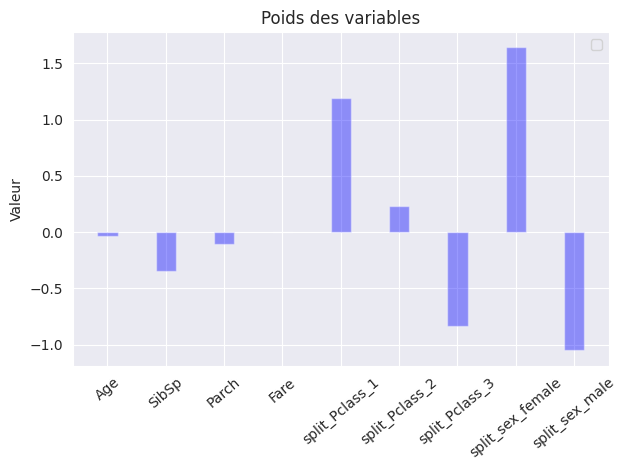

In [50]:
plot_lr_coefs(X, lr)

On note que l'information sur le sex à une très forte influence. En effet, On constate que le fait d'être une femme donne une plus grande chance survie contrairement au fait d'être un homme. On note également que grâce à cette nouvelle information, l'importance de la 1er classe augmente.

### 4. Tracer les histogrammes des survivants et des victimes pour la variable Age. Commenter.

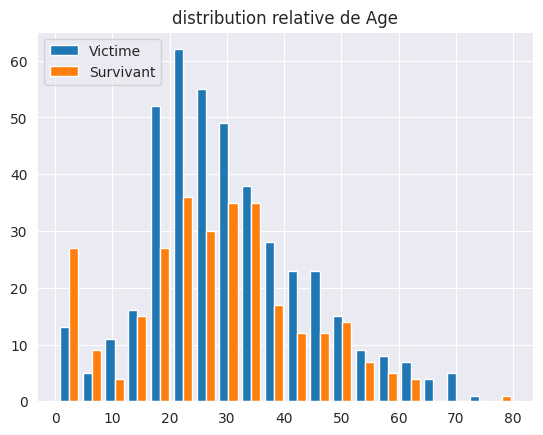

In [51]:
plot_hist("Age")

On observe que la probabilité de survivre est plus forte avec un âge compris entre 0 et 10ans. Alors qu'à l'inverse, il y a plus de chance de mourir lorsque l'on a entre 20 et 45 ans. Après cet âge, on a une probabilité de survivre d'environ 50%. On peut donc en déduire que l'introduction de cette nouvelle propriété va pouvoir améliorer le modèle.

### 5. Créer la variable non-linéaire is child

In [26]:
X["is_child"] = X.Age < 8

### 6. Calculer le modèle de régression logistique. Commenter.

In [27]:
lr = LogisticRegression()
lr.fit(X, y)

compute_score(lr, X, y)

/home/ludwig/Documents/ULCO/M2/IA - Verel/TPS/Tp2/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ludwig/Documents/ULCO/M2/IA - Verel/TPS/Tp2/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

0.7968489109283786

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


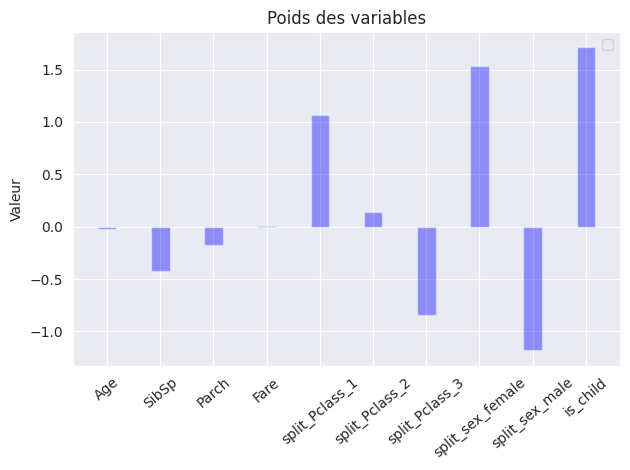

In [28]:
plot_lr_coefs(X, lr)

Cela confirme l'hypothèse précédente, car on obtient un meilleur score. Cela peut également se vérifier en traçant les coefficients de la régression logistique, on note en effect que le fait d'être considéré comme un enfant à une très grande importance dans le fait de survivre ou non.

# Partie 5 -  Selection de variable

### 1. En considérant les variables vu jusqu’à présent, quel est le meilleur modèle logistique ayant 2, 3 et 4 variables ?

In [53]:
columns = ['Age', 'SibSp', 'Parch', 'Fare', 'split_Pclass_1', 'split_Pclass_2',
           'split_Pclass_3', 'split_sex_female', 'split_sex_male', 'is_child']


def parse_model_3(X, keepColumns):
    X.Age = X.Age.fillna(np.nanmedian(X["Age"]))
    target = X.Survived

    class_dummies = pd.get_dummies(X["Pclass"], prefix="split_Pclass")
    X = X.join(class_dummies)

    class_dummies = pd.get_dummies(X["Sex"], prefix="split_sex")
    X = X.join(class_dummies)

    X["is_child"] = X.Age < 8

    to_del = [x for x in X.columns if x not in keepColumns]
    for col in to_del:
        del X[col]
    return X, target


def test_with_variables(nbVariables: int, columns, train, keepColumns=[]):
    if len(keepColumns) >= nbVariables:
        X, y = parse_model_3(train.copy(), keepColumns)

        lr = LogisticRegression(max_iter=1000000)
        lr.fit(X, y)

        score = compute_score(lr, X, y)

        return (score, keepColumns)

    hightestScore = (0, [])

    for colX in columns:
        if colX not in keepColumns:
            score = test_with_variables(nbVariables, columns, train, keepColumns + [colX])

            if score[0] > hightestScore[0]:
                hightestScore = score

    return hightestScore


with_1_vars = test_with_variables(1, columns, train.copy())
with_2_vars = test_with_variables(2, columns, train.copy())
with_3_vars = test_with_variables(3, columns, train.copy())
with_4_vars = test_with_variables(4, columns, train.copy())

print("#####")
print("Avec 1 variable : ", with_1_vars)
print("Avec 2 variables : ", with_2_vars)
print("Avec 3 variables : ", with_3_vars)
print("Avec 4 variables : ", with_4_vars)

#####
Avec 1 variable :  (0.7867365513778168, ['split_sex_female'])
Avec 2 variables :  (0.7889837423890528, ['SibSp', 'split_sex_female'])
Avec 3 variables :  (0.803577929822359, ['SibSp', 'split_sex_female', 'is_child'])
Avec 4 variables :  (0.8103069487163392, ['Parch', 'split_Pclass_3', 'split_sex_female', 'is_child'])


- Pour 2 variables : il est préférable d'utiliser les propriétés suivantes : `['SibSp', 'split_sex_female']`
- Pour 3 variables : il est préférable d'utiliser les propriétés suivantes : `['SibSp', 'split_sex_female', 'is_child']`
- Pour 4 variables : il est préférable d'utiliser les propriétés suivantes : `['SibSp', 'split_sex_female', 'is_child']`

### 2. Transformer les variables existantes en variable binaire (si ce n’est déjà le cas)

In [30]:
from sklearn.preprocessing import OneHotEncoder


def parse_model_4(X):
    X.Age = X.Age.fillna(np.nanmedian(X["Age"]))
    X["is_child"] = X.Age < 8
    class_dummies = pd.get_dummies(X["Pclass"], prefix="split_Pclass")
    X = X.join(class_dummies)

    class_dummies = pd.get_dummies(X["Sex"], prefix="split_sex")
    X = X.join(class_dummies)

    target = X.Survived

    keep = ['Parch', 'split_Pclass_3', 'split_sex_female', 'is_child']
    for col in X.columns:
        if col not in keep:
            del X[col]

    encoder = OneHotEncoder()

    datas = encoder.fit_transform(X)

    return pd.DataFrame(datas.toarray(), columns=encoder.get_feature_names()), target


### 3. Créer les variables produits x_i * x_j des variables binaires.

In [31]:
initial_width = X.shape[1]

X, y = parse_model_4(train.copy())

columnsList = X.columns

for i in columnsList:
    for j in columnsList:
        if i != j:
            vals = X[i] * X[j]

            X.insert(X.shape[1], "mul_" + i + "_" + j, vals, True)
            pass

for i in columnsList:
    del X[i]

/home/ludwig/Documents/ULCO/M2/IA - Verel/TPS/Tp2/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/tmp/ipykernel_76054/3511901015.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X.insert(X.shape[1], "mul_" + i + "_" + j, vals, True)
/tmp/ipykernel_76054/3511901015.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe

### 4. Calculer et comparer la régression logistique sur les nouvelles variables ainsi créées

In [32]:
lr = LogisticRegression(max_iter=1000000)
lr.fit(X, y)

compute_score(lr, X, y)

0.813709120582512

On remarque que l'on dispose d'un meilleur score avec celles nouvelles variables. On peut en déduire que l'introduction du procédé precedent apporte une amélioration du modèle.

### 5. Transformer les variables existantes en variable binaire dont les valeurs σi sont −1 ou +1

In [33]:
initial_width = X.shape[1]

X, y = parse_model_4(train.copy())

X = X.applymap(lambda x: x if x == 1 else -1)

/home/ludwig/Documents/ULCO/M2/IA - Verel/TPS/Tp2/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### 6. Créer les variables produits σ_i * σ_j des variables binaires

In [34]:
columnsList = X.columns

for i in columnsList:
    for j in columnsList:
        if i != j:
            vals = X[i] * X[j]

            X.insert(X.shape[1], "mul_" + i + "_" + j, vals, True)
            pass

for i in columnsList:
    del X[i]

/tmp/ipykernel_76054/617860580.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X.insert(X.shape[1], "mul_" + i + "_" + j, vals, True)
/tmp/ipykernel_76054/617860580.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X.insert(X.shape[1], "mul_" + i + "_" + j, vals, True)
/tmp/ipykernel_76054/617860580.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To g

### 7. Calculer et comparer la régression logistique sur les nouvelles variables ainsi créées.

In [35]:
lr = LogisticRegression(max_iter=1000000)
lr.fit(X, y)

compute_score(lr, X, y)

0.813709120582512

On constate également une amélioration du score par rapport au modèle précédent. Par conséquent, on peut en déduire qu'en utilisant des multiplications de variable binaire dont les valeurs sont 1 ou -1, à la place de multiplications de variable binaire dont les valeurs sont 0 ou 1, améliore le modèle.

# Partie 6 - Random Forest

### 1. Calculer le modèle de régression random forest sans utiliser la variable is child.

In [52]:
def parse_model_5(X):
    X.Age = X.Age.fillna(np.nanmedian(X["Age"]))

    target = X.Survived

    class_dummies = pd.get_dummies(X["Pclass"], prefix="split_Pclass")
    X = X.join(class_dummies)

    class_dummies = pd.get_dummies(X["Sex"], prefix="split_sex")
    X = X.join(class_dummies)

    to_del = ["Name", "Cabin", "Embarked", "Survived", "Ticket", "Sex", "Pclass"]
    for col in to_del:
        del X[col]
    return X, target


from sklearn.ensemble import RandomForestClassifier

train = pd.read_csv('titanic_train.csv', sep=',')
train.set_index("PassengerId", inplace=True, drop=True)

X, y = parse_model_5(train.copy())
rf = RandomForestClassifier()
rf.fit(X, y)

compute_score(rf, X, y)

0.8047705730964786

### 2. Comment est mesuré l’importance d’une variable dans le modèle random forest ?

Random Forest produit plein d'arbres de décision en utilisant le bagging, ce qui va entrainer un vote. Grâce à ce vote, on peut en déduire l’importance des variables.

### 3. Tracer l’importance des variables :

In [37]:
def classifier_importance(X, clf):
    import pylab as pl
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    pl.title("Feature importances")
    for tree in clf.estimators_:
        pl.plot(range(X.shape[1]), tree.feature_importances_[indices], "r")
    pl.plot(range(X.shape[1]), importances[indices], "b")
    pl.show()
    for f in range(X.shape[1]):
        print("%d. feature : %s (%f)" %
              (f + 1, X.columns[indices[f]], importances[indices[f]]))



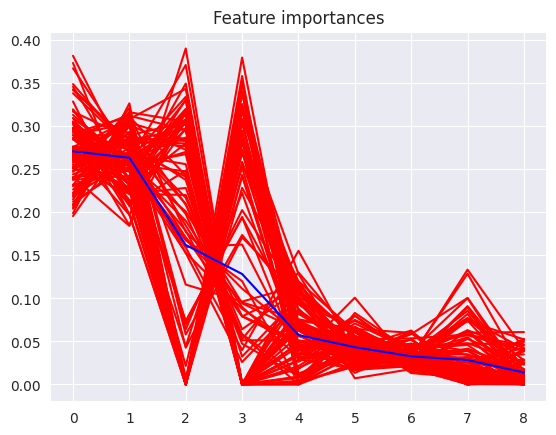

1. feature : Fare (0.270728)
2. feature : Age (0.263289)
3. feature : split_sex_male (0.161982)
4. feature : split_sex_female (0.128284)
5. feature : split_Pclass_3 (0.057371)
6. feature : SibSp (0.043307)
7. feature : Parch (0.032722)
8. feature : split_Pclass_1 (0.028378)
9. feature : split_Pclass_2 (0.013938)


In [38]:
rf = RandomForestClassifier()
rf.fit(X, y)
classifier_importance(X, rf)

### 4. Calculer l’importance des variables par la méthode ”Permutation”.

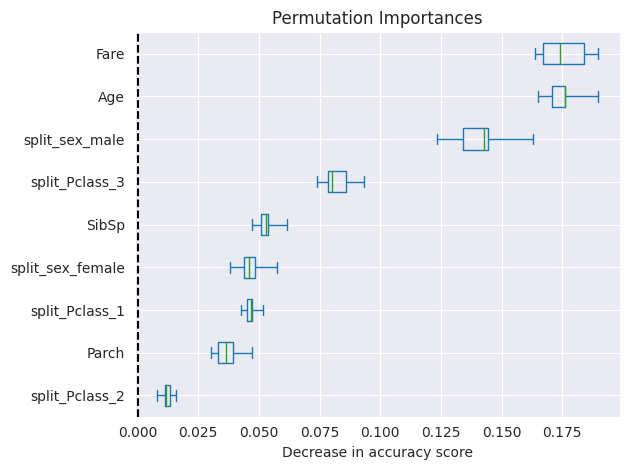

In [39]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rf, X, y, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

### 5. Interpréter l’importance des variables.

Grâce au graphique, on comprend que la variable Fare à une grande importance. Toute permutation avec cette variable entrainera une forte baisse du score de la précision. On note le même phénomène avec la variable Age.
Alors que lors de permutations des variables  split_Pclass_2, split_Pclass_1 ou Parch, on note une faible variation du score de précision, de plus elles ont une faible importance dans le modèle.

# Partie 7 - Gradient Boosting

### 1. Comparer les performances de la méthode gradient boosting avec random forest.

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

rf = GradientBoostingClassifier()
rf.fit(X, y)

compute_score(rf, X, y)

0.8237900947837549

On note que l'on obtient un meilleur score avec Gradient Boosting qu'avec Random forest.
On peut expliquer cela par le fait, que par rapport à Random Forest qui les répercute à la fin, Gradient Boosting construit les arbres un par un et répercute directement l'erreur sur les suivants.